In [43]:
#AML Project 1, FFU
import pandas as pd
import numpy as np
import os.path

#absolute path data
path = '~/Documents/GitHub/aml2020/task1'

#Load in the training data
fname = 'X_train.csv'
fpath = os.path.join(path,fname)
df_x = pd.read_csv(fpath)

fname = 'y_train.csv'
fpath = os.path.join(path,fname)
df_y = pd.read_csv(fpath)

In [44]:
#check summary stats
df_x.describe(include='all')

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
count,1212.000000,1118.000000,1114.000000,1117.000000,1106.000000,1.117000e+03,1128.000000,1105.000000,1127.000000,1.116000e+03,...,1.134000e+03,1125.000000,1098.000000,1121.000000,1120.000000,1109.000000,1115.000000,1.112000e+03,1124.000000,1091.000000
mean,605.500000,10.026057,832442.859290,20585.524887,1048.958235,1.000291e+06,10.085010,597900.429955,10389.657239,9.998422e+05,...,1.049674e+06,-876.044006,13492.600186,10.554762,10.057767,1066.141107,10.008269,1.050199e+06,99798.480171,104903.905758
std,350.018571,0.968347,0.028258,0.029051,28.430733,9.740891e+04,0.968026,0.028128,1655.843472,1.022441e+05,...,2.839579e+04,164.585576,2519.835006,0.283844,0.982656,226.606986,1.018930,2.814210e+04,9576.128720,2768.405350
min,0.000000,6.672068,832442.808579,20585.473809,1000.063783,6.800215e+05,6.984052,597900.381003,3644.074892,6.095730e+05,...,1.000105e+06,-1597.766964,2536.030655,10.010366,6.841039,496.007706,6.466963,1.000002e+06,73207.994891,100012.896777
25%,302.750000,9.381273,832442.835941,20585.501013,1024.969967,9.360882e+05,9.470582,597900.406110,9339.537887,9.322937e+05,...,1.025054e+06,-975.398714,11947.954006,10.321039,9.379001,899.067501,9.325229,1.027575e+06,93416.252400,102596.190683
50%,605.500000,10.000079,832442.860041,20585.524817,1047.985497,1.000557e+06,10.089601,597900.429787,10295.013382,1.001261e+06,...,1.049296e+06,-875.508235,13352.186179,10.554260,10.114370,1049.027077,10.005684,1.050262e+06,99802.127899,104846.235709
75%,908.250000,10.664998,832442.882951,20585.550525,1073.180317,1.064617e+06,10.752707,597900.452983,11304.073469,1.068359e+06,...,1.074354e+06,-773.174562,14893.726023,10.792195,10.745370,1215.057985,10.658120,1.073831e+06,106400.748441,107098.669350
max,1211.000000,12.956099,832442.908334,20585.573514,1099.977638,1.331630e+06,12.747734,597900.480810,17347.531573,1.284804e+06,...,1.099771e+06,-281.030205,24815.260375,11.091050,13.530204,2122.032859,13.163113,1.099918e+06,130694.436443,109984.169649


In [45]:
#check for missing values
missing_data = df_x.isnull()
missing_data.head(5)

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [46]:
#check for missing values in y
missing_data = df_y.isnull()
missing_data.head(5)

,id,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [47]:
#identify columns which contains constant values and some noise.
#use the coefficient of variation CV as metric (CV = sigma/mean).
#drop columns in which CV > 1e-3 (try different values of CV)
#I have checked out that cv_min > 1e-2 has no impact. However, choosing cv_min > 1e-1 adds additionally ~600 columns. To be checked
cv_min = 1e-2
dropped_cols_mean = [] #zero mean
dropped_cols_cv = [] #CV
n = 0
n_tot = len(df_x.columns)
for column in df_x:
    mean = df_x[column].astype("float").mean()
    if mean == 0:
        print("mean = 0: dropping column", column)
        dropped_cols_mean.append(column)
        n = n+1
    else: 
        cv = df_x[column].astype("float").std()/abs(mean)
        if cv > cv_min:
            print("cv > ", cv_min,": dropping column", column)
            dropped_cols_cv.append(column)
            n = n+1
print(n,n_tot)

cv >  0.01 : dropping column id
cv >  0.01 : dropping column x0
cv >  0.01 : dropping column x3
cv >  0.01 : dropping column x4
cv >  0.01 : dropping column x5
cv >  0.01 : dropping column x7
cv >  0.01 : dropping column x8
cv >  0.01 : dropping column x10
cv >  0.01 : dropping column x11
cv >  0.01 : dropping column x12
cv >  0.01 : dropping column x13
cv >  0.01 : dropping column x14
cv >  0.01 : dropping column x15
cv >  0.01 : dropping column x17
cv >  0.01 : dropping column x18
cv >  0.01 : dropping column x19
cv >  0.01 : dropping column x20
cv >  0.01 : dropping column x21
cv >  0.01 : dropping column x22
cv >  0.01 : dropping column x23
cv >  0.01 : dropping column x24
cv >  0.01 : dropping column x25
cv >  0.01 : dropping column x26
cv >  0.01 : dropping column x27
cv >  0.01 : dropping column x28
cv >  0.01 : dropping column x29
cv >  0.01 : dropping column x30
cv >  0.01 : dropping column x31
cv >  0.01 : dropping column x32
cv >  0.01 : dropping column x33
cv >  0.01 : drop

cv >  0.01 : dropping column x332
cv >  0.01 : dropping column x333
cv >  0.01 : dropping column x334
cv >  0.01 : dropping column x336
cv >  0.01 : dropping column x337
cv >  0.01 : dropping column x338
mean = 0: dropping column x339
cv >  0.01 : dropping column x340
cv >  0.01 : dropping column x341
cv >  0.01 : dropping column x342
cv >  0.01 : dropping column x343
cv >  0.01 : dropping column x344
cv >  0.01 : dropping column x345
cv >  0.01 : dropping column x346
cv >  0.01 : dropping column x347
cv >  0.01 : dropping column x348
cv >  0.01 : dropping column x349
cv >  0.01 : dropping column x350
cv >  0.01 : dropping column x351
cv >  0.01 : dropping column x352
cv >  0.01 : dropping column x353
cv >  0.01 : dropping column x354
cv >  0.01 : dropping column x355
cv >  0.01 : dropping column x356
cv >  0.01 : dropping column x357
cv >  0.01 : dropping column x358
cv >  0.01 : dropping column x359
cv >  0.01 : dropping column x360
cv >  0.01 : dropping column x361
cv >  0.01 : drop

In [48]:
#check that indeed the column contains only zeros
df_x["x629"]

0       0.0
1       0.0
2       NaN
3       0.0
4       0.0
       ... 
1207    0.0
1208    0.0
1209    0.0
1210    0.0
1211    0.0
Name: x629, Length: 1212, dtype: float64

In [49]:
#drop the columns with mean = 0 and cv > cv_min
df_x.drop(dropped_cols_mean,axis=1,inplace=True)
df_x.drop(dropped_cols_cv,axis=1,inplace=True)

In [50]:
df_x.head(10)

,x1,x2,x6,x9,x16,x34,x50,x78,x82,x83,...,x700,x719,x721,x729,x735,x747,x755,x762,x778,x811
0,832442.812375,20585.544083,597900.477629,785176.201298,155995.454645,139494.789412,199674.588541,258780.789314,598658.902230,431945.600719,...,969909.893878,731994.241312,304614.507586,950714.400275,440153.105809,291229.878732,708072.877765,524756.925425,46451.432849,NaN
1,832442.898114,NaN,597900.458612,785176.258299,NaN,NaN,199674.651334,258780.737537,598658.941610,431945.652688,...,969909.934335,731994.227794,304614.531025,NaN,440153.056064,291229.913403,708072.951576,524756.985260,46451.369308,212339.931756
2,832442.896307,20585.512844,597900.426764,785176.223468,155995.367237,139494.776583,199674.644429,258780.747794,598658.894743,431945.657664,...,969909.931679,NaN,304614.524902,950714.417273,NaN,291229.933937,708072.931930,NaN,46451.452934,212339.935348
3,NaN,NaN,597900.450367,785176.254867,155995.459579,139494.765626,199674.599996,258780.738154,NaN,431945.669792,...,969909.923856,731994.252541,304614.556024,950714.405812,440153.116978,291229.941866,708072.955712,524756.946430,46451.418925,212339.966651
4,832442.831424,20585.557007,597900.423639,785176.190880,155995.366078,139494.819778,199674.636988,258780.796857,598658.952527,431945.681412,...,969909.886295,731994.269554,304614.523858,950714.437299,440153.118052,NaN,NaN,NaN,46451.418762,212339.964397
5,832442.882921,20585.548624,597900.434742,785176.248738,155995.405152,139494.758395,199674.661913,258780.759585,598658.898978,431945.618759,...,NaN,731994.284565,304614.509526,950714.357790,NaN,291229.930967,708072.925428,524756.932275,46451.459701,212339.947805
6,832442.816841,20585.544187,597900.436187,785176.270535,155995.391941,139494.797824,199674.599558,258780.770897,598658.948749,431945.600350,...,969909.896531,731994.262121,304614.491930,NaN,440153.142521,291229.928946,708072.918743,NaN,46451.428899,212339.973678
7,832442.828716,20585.506866,597900.465500,785176.229852,155995.387878,139494.819912,199674.632085,258780.739861,598658.925787,431945.633602,...,969909.955454,731994.291134,304614.464883,950714.388672,440153.143826,291229.879617,708072.933370,524757.005869,46451.428815,212339.997565
8,NaN,20585.563635,597900.438419,785176.264322,155995.449054,139494.744329,199674.613344,258780.788017,598658.967478,431945.633532,...,969909.967315,731994.252070,304614.531841,950714.420495,440153.097161,291229.927998,708072.933210,524756.969107,46451.381265,212339.966423
9,832442.897556,20585.491579,597900.404895,785176.216717,155995.369267,NaN,199674.648474,258780.765904,598658.965911,431945.616039,...,969909.901369,731994.275236,304614.477578,950714.407590,440153.131688,291229.921608,708072.961932,524756.928303,46451.395600,212339.983408


In [51]:
#replace each column's nan with the mean value
for column in df_x:
    if df_x[column].isnull().values.any():
        mean = df_x[column].astype("float").mean()
        df_x[column].replace(np.nan, mean, inplace=True)
df_x.describe()

,x1,x2,x6,x9,x16,x34,x50,x78,x82,x83,...,x700,x719,x721,x729,x735,x747,x755,x762,x778,x811
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,832442.859290,20585.524887,597900.429955,785176.225858,155995.413146,139494.771466,199674.632100,258780.771663,598658.936075,431945.636701,...,969909.931983,731994.258637,304614.514322,950714.405417,440153.105105,291229.898863,708072.921625,524756.955462,46451.416567,212339.947914
std,0.027090,0.027888,0.026856,0.027733,0.027800,0.027203,0.027839,0.027572,0.028099,0.027232,...,0.028350,0.027062,0.027456,0.028072,0.027603,0.027620,0.027385,0.027419,0.027410,0.027723
min,832442.808579,20585.473809,597900.381003,785176.176297,155995.364562,139494.721189,199674.582490,258780.722985,598658.885546,431945.586790,...,969909.882367,731994.209828,304614.464598,950714.355774,440153.053589,291229.849510,708072.869772,524756.906895,46451.366294,212339.898409
25%,832442.838507,20585.503515,597900.408556,785176.202866,155995.389761,139494.749884,199674.609405,258780.748592,598658.911046,431945.614443,...,969909.907031,731994.236605,304614.492436,950714.381282,440153.081688,291229.875656,708072.899883,524756.932727,46451.394156,212339.925024
50%,832442.859290,20585.524887,597900.429955,785176.225858,155995.413146,139494.771466,199674.632100,258780.771663,598658.936075,431945.636701,...,969909.931983,731994.258637,304614.514322,950714.405417,440153.105105,291229.898863,708072.921625,524756.955462,46451.416567,212339.947914
75%,832442.880460,20585.547770,597900.451121,785176.249144,155995.435388,139494.792681,199674.654843,258780.793967,598658.960353,431945.658470,...,969909.955515,731994.280309,304614.536515,950714.428013,440153.128298,291229.921873,708072.944068,524756.977980,46451.438107,212339.971428
max,832442.908334,20585.573514,597900.480810,785176.276168,155995.464339,139494.820754,199674.682404,258780.822758,598658.985536,431945.686689,...,969909.982093,731994.309793,304614.564462,950714.455575,440153.153523,291229.948949,708072.969689,524757.006578,46451.466262,212339.998301


In [52]:
df = pd.concat([df_y,df_x],axis=1)
df.drop(["id"],axis=1,inplace=True)
df.describe()

,y,x1,x2,x6,x9,x16,x34,x50,x78,x82,...,x700,x719,x721,x729,x735,x747,x755,x762,x778,x811
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,69.665842,832442.859290,20585.524887,597900.429955,785176.225858,155995.413146,139494.771466,199674.632100,258780.771663,598658.936075,...,969909.931983,731994.258637,304614.514322,950714.405417,440153.105105,291229.898863,708072.921625,524756.955462,46451.416567,212339.947914
std,9.831347,0.027090,0.027888,0.026856,0.027733,0.027800,0.027203,0.027839,0.027572,0.028099,...,0.028350,0.027062,0.027456,0.028072,0.027603,0.027620,0.027385,0.027419,0.027410,0.027723
min,42.000000,832442.808579,20585.473809,597900.381003,785176.176297,155995.364562,139494.721189,199674.582490,258780.722985,598658.885546,...,969909.882367,731994.209828,304614.464598,950714.355774,440153.053589,291229.849510,708072.869772,524756.906895,46451.366294,212339.898409
25%,64.000000,832442.838507,20585.503515,597900.408556,785176.202866,155995.389761,139494.749884,199674.609405,258780.748592,598658.911046,...,969909.907031,731994.236605,304614.492436,950714.381282,440153.081688,291229.875656,708072.899883,524756.932727,46451.394156,212339.925024
50%,70.000000,832442.859290,20585.524887,597900.429955,785176.225858,155995.413146,139494.771466,199674.632100,258780.771663,598658.936075,...,969909.931983,731994.258637,304614.514322,950714.405417,440153.105105,291229.898863,708072.921625,524756.955462,46451.416567,212339.947914
75%,76.000000,832442.880460,20585.547770,597900.451121,785176.249144,155995.435388,139494.792681,199674.654843,258780.793967,598658.960353,...,969909.955515,731994.280309,304614.536515,950714.428013,440153.128298,291229.921873,708072.944068,524756.977980,46451.438107,212339.971428
max,97.000000,832442.908334,20585.573514,597900.480810,785176.276168,155995.464339,139494.820754,199674.682404,258780.822758,598658.985536,...,969909.982093,731994.309793,304614.564462,950714.455575,440153.153523,291229.948949,708072.969689,524757.006578,46451.466262,212339.998301


<Figure size 432x288 with 0 Axes>

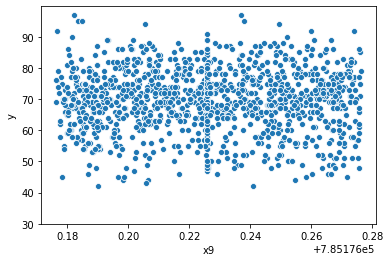

<Figure size 432x288 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(data=df, x="x9", y="y")
plt.ylim(30,)
plt.figure()

In [69]:
df.columns

Index(['y', 'x1', 'x2', 'x6', 'x9', 'x16', 'x34', 'x50', 'x78', 'x82', 'x83',
       'x145', 'x153', 'x166', 'x195', 'x206', 'x232', 'x256', 'x263', 'x266',
       'x269', 'x317', 'x335', 'x363', 'x364', 'x374', 'x378', 'x379', 'x399',
       'x422', 'x449', 'x454', 'x480', 'x481', 'x500', 'x505', 'x527', 'x586',
       'x588', 'x609', 'x627', 'x639', 'x645', 'x664', 'x679', 'x684', 'x700',
       'x719', 'x721', 'x729', 'x735', 'x747', 'x755', 'x762', 'x778', 'x811'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

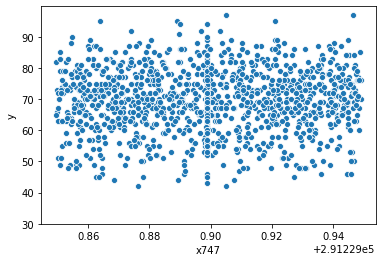

<Figure size 432x288 with 0 Axes>

In [70]:
sns.scatterplot(data=df, x="x747", y="y")
plt.ylim(30,)
plt.figure()

<Figure size 432x288 with 0 Axes>

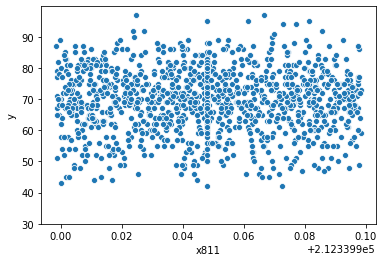

<Figure size 432x288 with 0 Axes>

In [71]:
sns.scatterplot(data=df, x="x811", y="y")
plt.ylim(30,)
plt.figure()

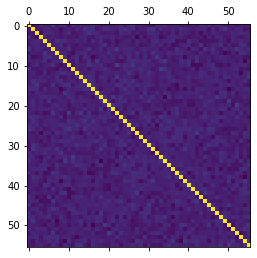

In [72]:
p = df.corr()
plt.matshow(p)
plt.show()